In [1]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
# from plotnine import *
import seaborn as sns

### Import Data

In [2]:
Data = dt.fread("/Users/user/Desktop/自動化/Response Data.csv").to_pandas()

In [3]:
# pd.set_option("max_columns", None) 
# Data.head()

### Change Columns' Types
#### For Plotting

In [4]:
# 需要用到的變數並且分類成類別或是數值
DiscreteVar = ["Police_Force", "Day_of_Week", "1st_Road_Class", "Road_Type", "Vehicle_Location-Restricted_Lane",
               "Junction_Detail", "Junction_Control", "2nd_Road_Class", "Was_Vehicle_Left_Hand_Drive?",
               "Pedestrian_Crossing-Physical_Facilities", "Light_Conditions", "Weather_Conditions",
               "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Journey_Purpose_of_Driver",
               "Urban_or_Rural_Area", "Did_Police_Officer_Attend_Scene_of_Accident", "Casualty_Class", 
               "Sex_of_Casualty", "Age_Band_of_Casualty", "Casualty_Type", "Pedestrian_Crossing-Human_Control", 
               "Pedestrian_Location", "Pedestrian_Movement", "Casualty_Home_Area_Type", "Vehicle_Type", 
               "Towing_and_Articulation", "Vehicle_Manoeuvre" ,"Junction_Location", "Skidding_and_Overturning",
               "Hit_Object_in_Carriageway", "1st_Point_of_Impact", "Sex_of_Driver", "Age_Band_of_Driver", 
               "Propulsion_Code", "Driver_IMD_Decile", "Driver_Home_Area_Type", "LuckyOrNot"]

NumericVar = ["Number_of_Vehicles", "Number_of_Casualties", "Speed_limit", "Age_of_Casualty", 
              "Car_Passenger", "Bus_or_Coach_Passenger", "Pedestrian_Road_Maintenance_Worker",
              "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle"]

In [15]:
for i in Data.columns :
    if i in DiscreteVar :
        if Data.loc[:, i].dtypes != "object" :
            Data.loc[:, i] = Data[i].astype(str).values
        else :
            continue
    elif i in NumericVar :
        if Data.loc[:, i].dtypes != "float" :
            Data.loc[:, i] = Data[i].astype(float).values
        else :
            continue
    else :
        continue

CPU times: user 15.2 ms, sys: 8.87 ms, total: 24.1 ms
Wall time: 96.8 ms


### Replace -999 to Values Correspond to The Column Types

In [6]:
Data_num_var_list = [x for x in Data.columns if x in NumericVar]
Data_str_var_list = [x for x in Data.columns if x in DiscreteVar]
Data.loc[:, Data_num_var_list] = Data[Data_num_var_list].replace(to_replace = -999.0, value = np.nan)
Data.loc[:, Data_str_var_list] = Data[Data_str_var_list].replace(to_replace = "-999", value = "Others or Missing")

In [7]:
Data.head(5)

,Day_of_Week,1st_Road_Class,Road_Type,Vehicle_Location-Restricted_Lane,Junction_Detail,Junction_Control,2nd_Road_Class,Was_Vehicle_Left_Hand_Drive?,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,...,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Age_of_Casualty,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,Tuesday,A,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,Others or Missing,Others or Missing,1,Zebra,Daylight,...,1.0,1.0,30.0,37.0,0.0,0.0,NaN,74.0,NaN,NaN
1,Wednesday,B,Dual carriageway,On main c'way - not in restricted lane,Crossroads,Auto traffic signal,C,1,Pedestrian phase at traffic signal junction,Darkness - lights lit,...,1.0,1.0,30.0,37.0,0.0,4.0,NaN,42.0,8268.0,3.0
2,Thursday,C,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,Others or Missing,Others or Missing,1,No physical crossing facilities within 50 metres,Darkness - lights lit,...,2.0,1.0,30.0,62.0,0.0,0.0,NaN,62.0,1762.0,6.0
3,Friday,A,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,Others or Missing,Others or Missing,1,No physical crossing facilities within 50 metres,Daylight,...,1.0,1.0,30.0,30.0,0.0,0.0,NaN,49.0,1769.0,4.0
4,Monday,Unclassified,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,Others or Missing,Others or Missing,1,No physical crossing facilities within 50 metres,Darkness - lighting unknown,...,1.0,1.0,30.0,49.0,0.0,0.0,NaN,49.0,85.0,10.0


In [8]:
# Check missing percentage
Discrete_Ser = Data.select_dtypes(["object"]).apply(lambda x : x[x == "Others or Missing"].count()).divide(Data.shape[0])
Numeric_Ser = Data.select_dtypes(["float", "int"]).apply(lambda x : x.isnull().sum()).divide(Data.shape[0])
Discrete_Ser.append(Numeric_Ser)[Discrete_Ser.append(Numeric_Ser) >= 0.2]
# 2nd_Road_Class, Junction_Control, Propulsion_Code, Driver_IMD_Decile, Pedestrian_Road_Maintenance_Worker

Junction_Control                      0.367242
2nd_Road_Class                        0.420547
Journey_Purpose_of_Driver             0.726724
Propulsion_Code                       0.241899
Driver_IMD_Decile                     0.288484
Pedestrian_Road_Maintenance_Worker    0.598930
Engine_Capacity_(CC)                  0.247660
Age_of_Vehicle                        0.277768
dtype: float64

In [9]:
# Drop too many missing columns
Data.drop(["2nd_Road_Class", "Junction_Control", "Propulsion_Code", "Driver_IMD_Decile", "Pedestrian_Road_Maintenance_Worker"], axis = 1, inplace = True)

## Plot Starts!

### Discrete Variables

In [10]:
def PLOT(var) :
    global Data
    Data[var].value_counts().sort_values().plot.barh()

Day_of_Week  :



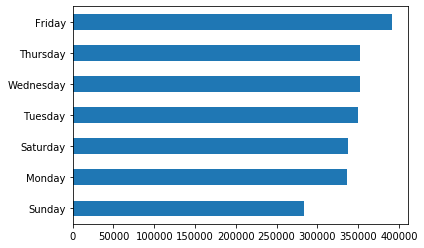

1st_Road_Class  :



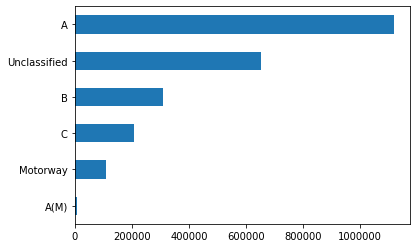

Road_Type  :



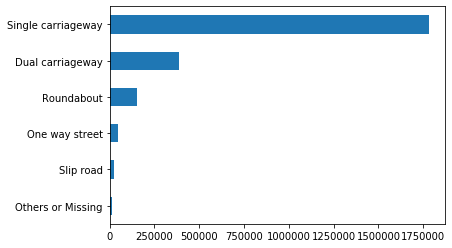

Vehicle_Location-Restricted_Lane  :



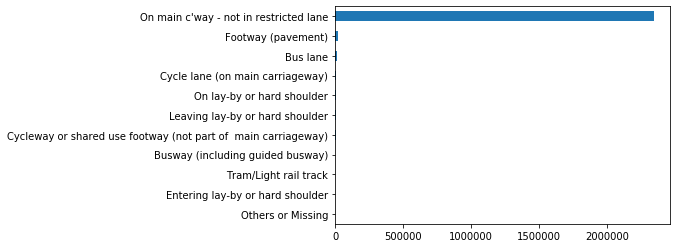

Junction_Detail  :



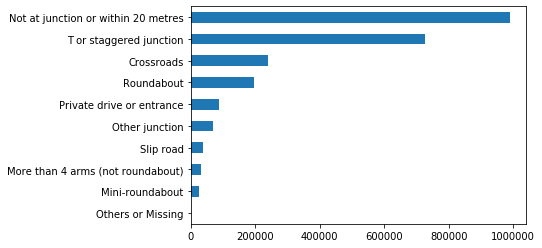

Was_Vehicle_Left_Hand_Drive?  :



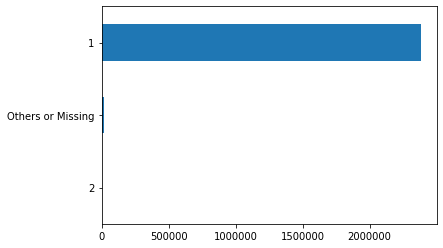

Pedestrian_Crossing-Physical_Facilities  :



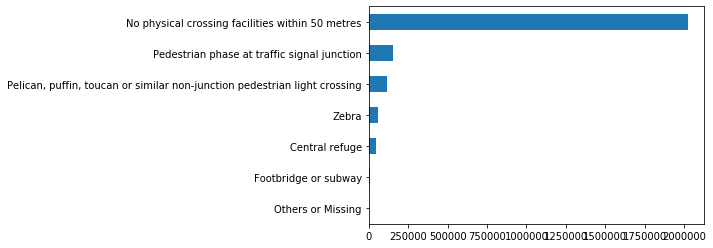

Light_Conditions  :



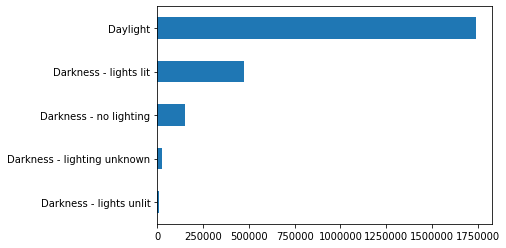

Weather_Conditions  :



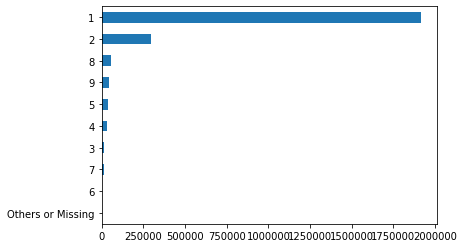

Road_Surface_Conditions  :



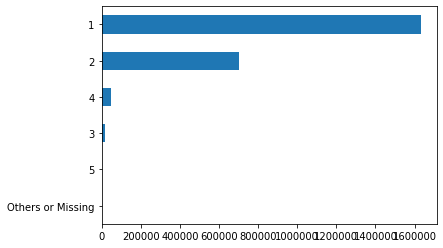

Special_Conditions_at_Site  :



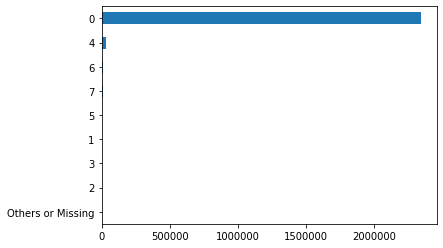

Carriageway_Hazards  :



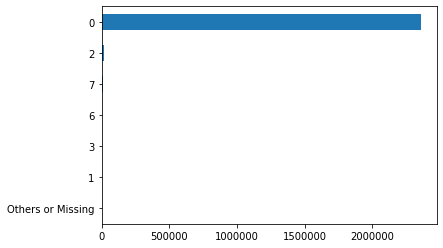

Journey_Purpose_of_Driver  :



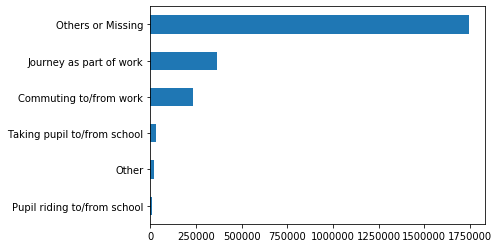

Urban_or_Rural_Area  :



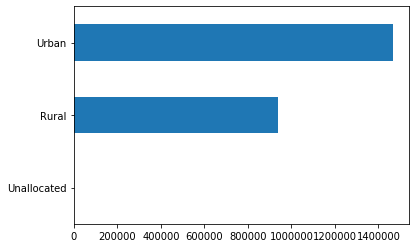

Did_Police_Officer_Attend_Scene_of_Accident  :



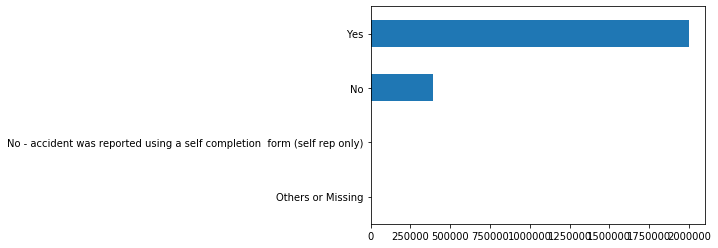

Casualty_Class  :



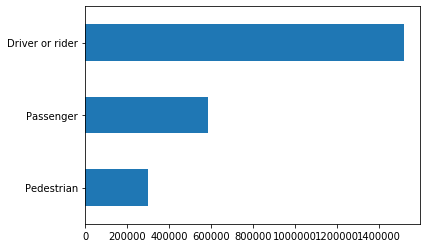

Sex_of_Casualty  :



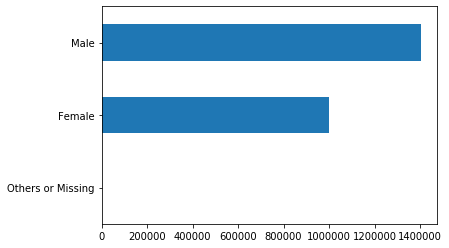

Age_Band_of_Casualty  :



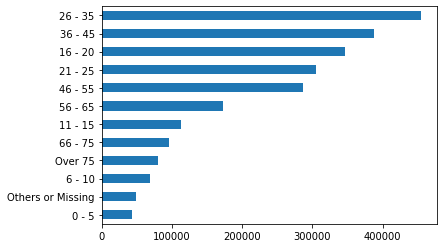

Casualty_Type  :



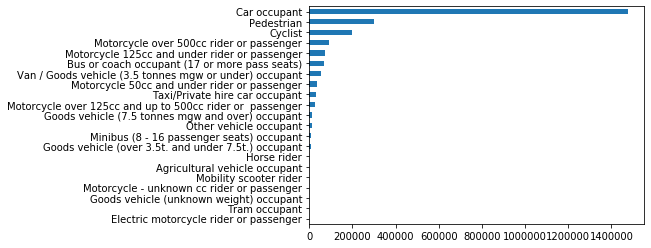

Pedestrian_Crossing-Human_Control  :



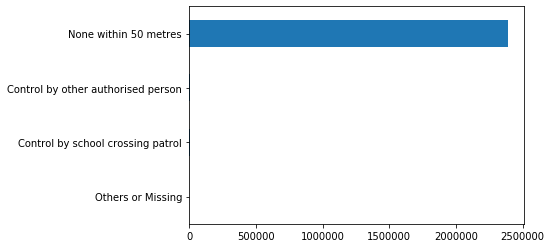

Pedestrian_Location  :



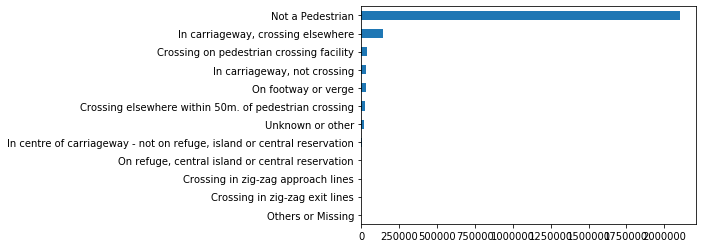

Pedestrian_Movement  :



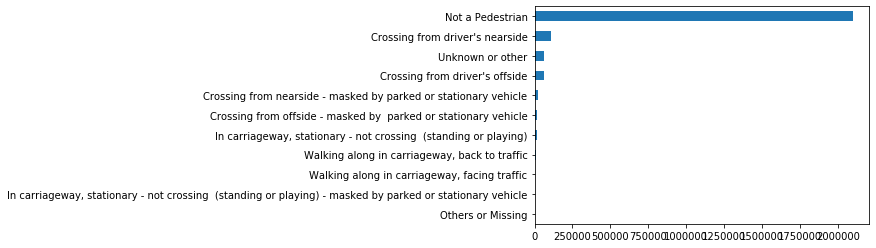

Casualty_Home_Area_Type  :



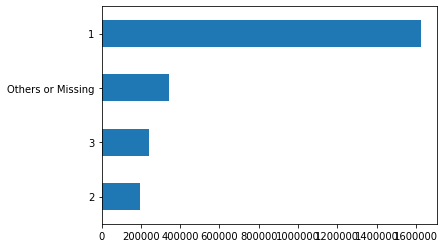

Vehicle_Type  :



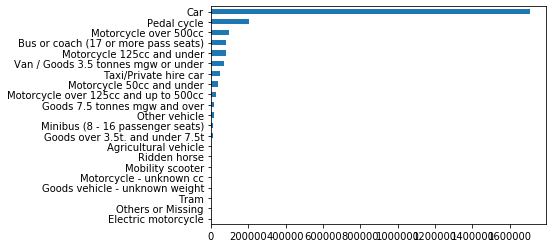

Towing_and_Articulation  :



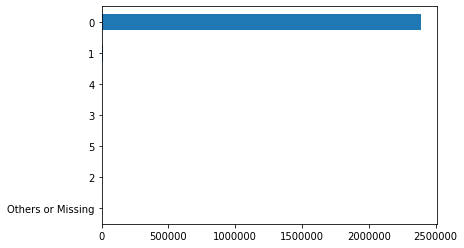

Vehicle_Manoeuvre  :



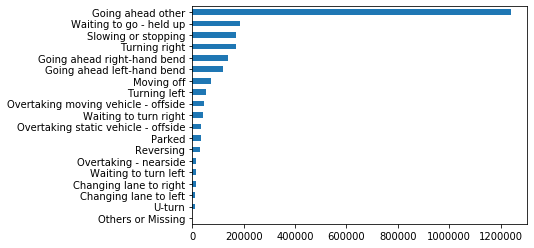

Junction_Location  :



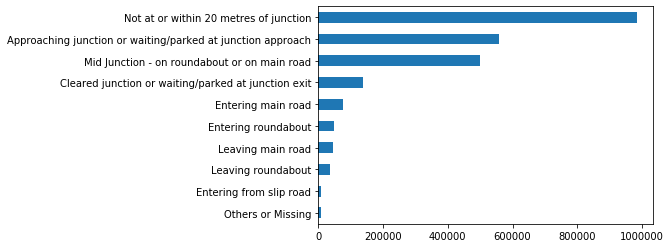

Skidding_and_Overturning  :



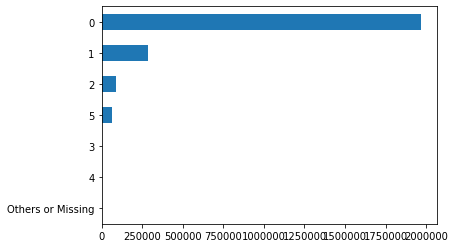

Hit_Object_in_Carriageway  :



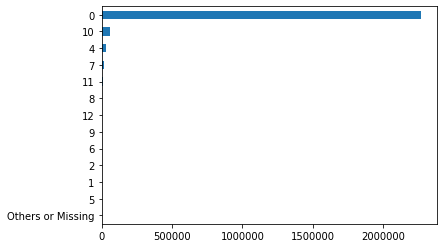

1st_Point_of_Impact  :



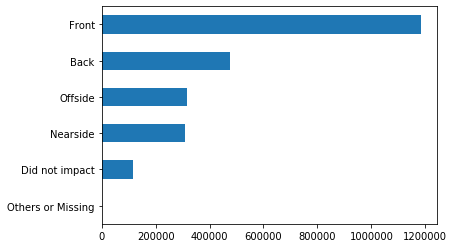

Sex_of_Driver  :



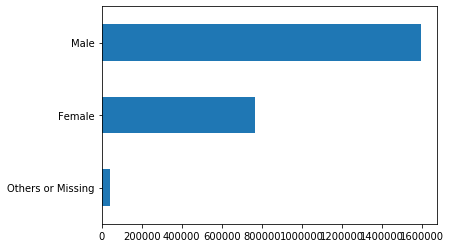

Age_Band_of_Driver  :



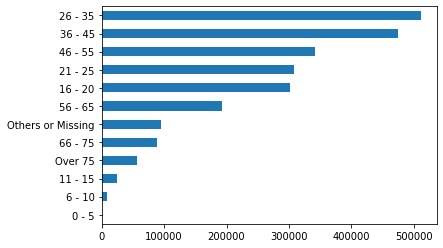

Driver_Home_Area_Type  :



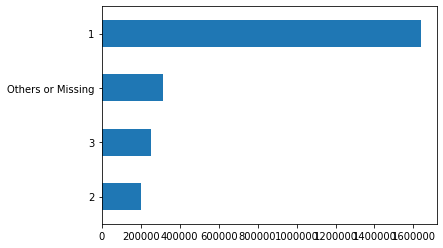

LuckyOrNot  :



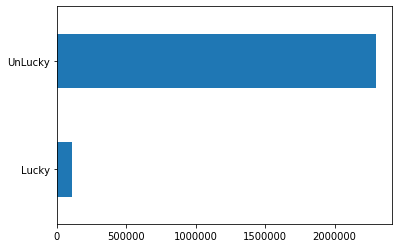

In [11]:
for i in Data.columns :
    if i in DiscreteVar :
        print(i, " :")
        print()
        PLOT(i)
        plt.show()
    else :
        continue

### Numeric Variables

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f76aaac8>,
      dtype=object)

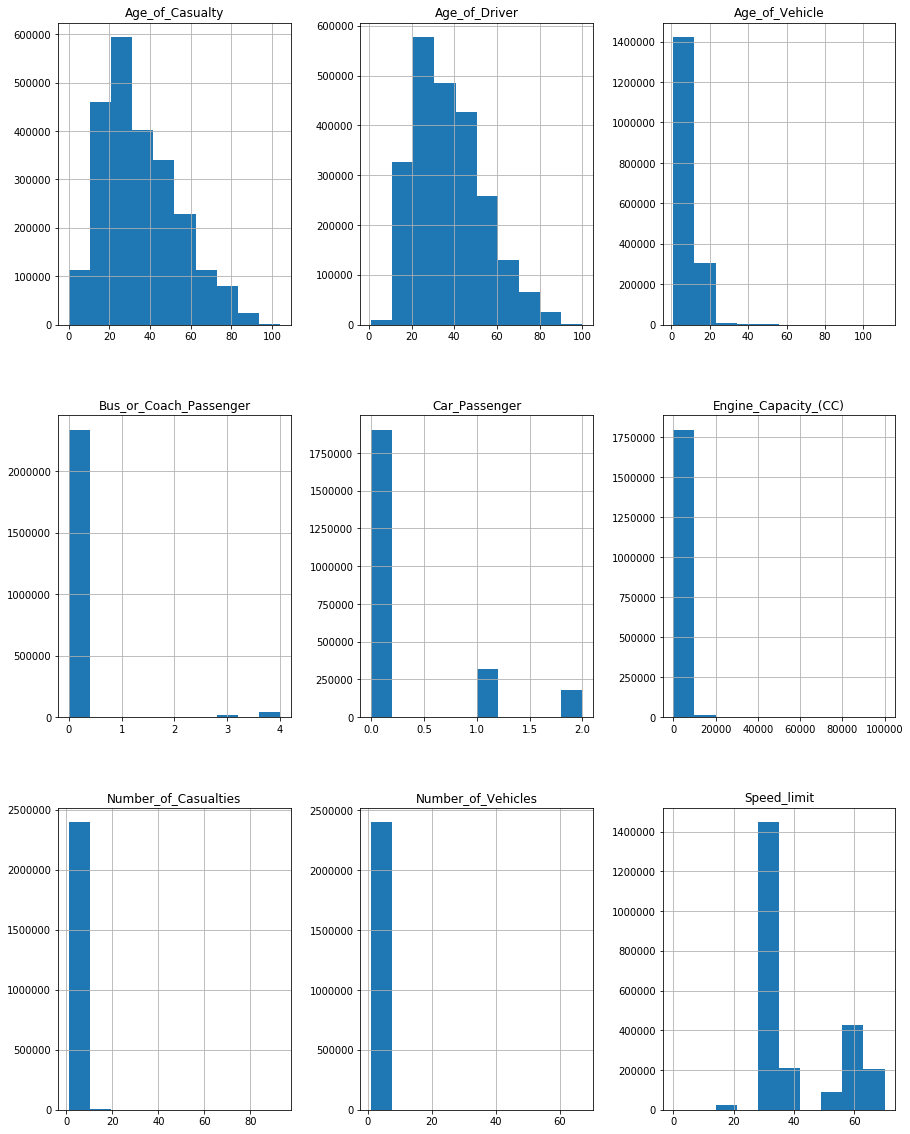

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Data.hist(ax = ax)

In [13]:
Data.to_csv("/Users/user/Desktop/自動化/UKCars_var_select.csv", index = False)